In [ ]:
!pip install yfinance matplotlib pandas numpy

### Импорт библиотек 

In [11]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from datetime import datetime
import statsmodels.api as sm

### Загрузка данных временного ряда с ценами активов Apple

In [55]:
# Загрузка данных о компании Apple с Yahoo Finance
apple = yf.Ticker("AAPL")
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
# Оставим только колонку с закрытыми ценами (Close)
data = data[['Close']]
data.rename(columns={'Close': 'Price'}, inplace=True)
# Получение исторических данных за последний год
df = apple.history(period="1y")
df = df.drop(columns=["Dividends", "Stock Splits"])  # Удаление ненужных столбцов
df.index = pd.to_datetime(df.index)  # Убедиться, что индекс в формате даты
print(df)


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Date                                                                        
2023-12-20 00:00:00-05:00  195.940089  196.716285  193.880188  193.880188   
2023-12-21 00:00:00-05:00  195.143987  196.119205  192.556656  193.730896   
2023-12-22 00:00:00-05:00  194.228458  194.457347  192.029240  192.656174   
2023-12-26 00:00:00-05:00  192.666139  192.944773  191.889943  192.108871   
2023-12-27 00:00:00-05:00  191.551588  192.556659  190.158404  192.208359   
...                               ...         ...         ...         ...   
2024-12-16 00:00:00-05:00  247.990005  251.380005  247.649994  251.039993   
2024-12-17 00:00:00-05:00  250.080002  253.830002  249.779999  253.479996   
2024-12-18 00:00:00-05:00  252.160004  254.279999  247.740005  248.050003   
2024-12-19 00:00:00-05:00  247.500000  252.000000  247.089996  249.789993   
2024-12-20 00:00:00-05:00  248.119995  252.509995  246.300003  252.479996   

### Отображение данных на графике

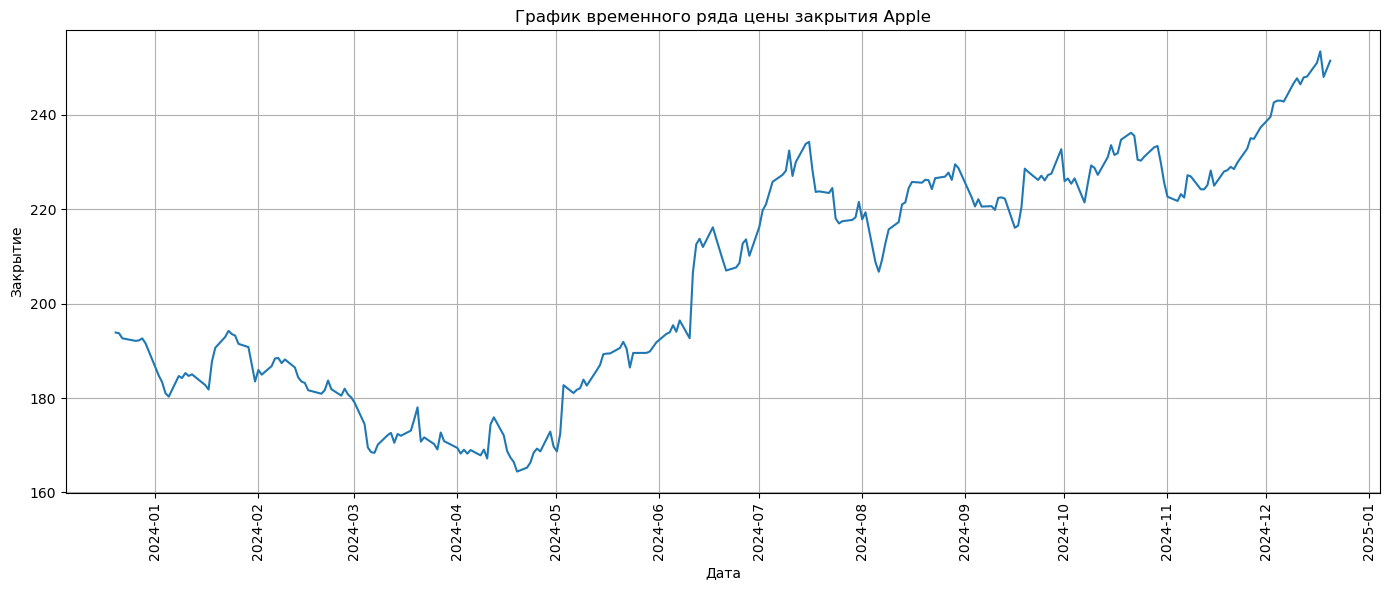

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"])  # Используем столбец 'Close' из данных yfinance
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0] - pd.Timedelta(days=15), df.index[-1] + pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("График временного ряда цены закрытия Apple")
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()

### Оценка временного ряда
График автокорреляции показал, что существует сильная автокорреляция на малых лагах, которая постепенно уменьшается до нуля. Это свидетельствует о том, что временной ряд не является случайным, а имеет определенные тренды. Начиная с лага около 200, корреляция становится незначительной.

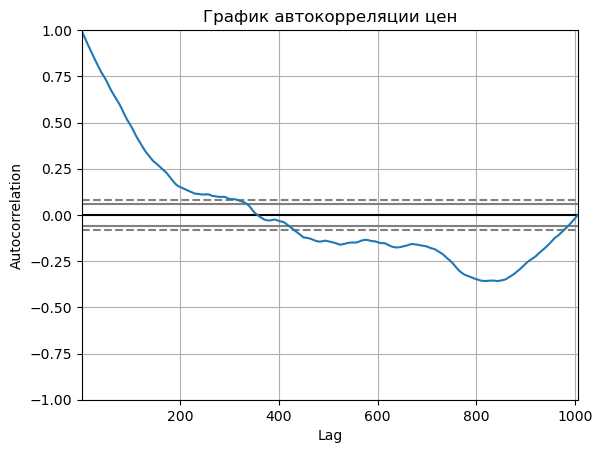

In [57]:
# График автокорреляции
pd.plotting.autocorrelation_plot(data['Price'])
plt.title('График автокорреляции цен')
plt.show()

### Cкользящее среднее
Были построены четыре простые скользящие средние (SMA) с окнами 5, 10, 30 и 50. График показывает, что более короткие окна лучше следуют за ценой акций, тогда как более длинные окна (SMA 50) сглаживают колебания и показывают общие тренды. Скользящие средние помогают устранить шум и выявить долгосрочные тренды.

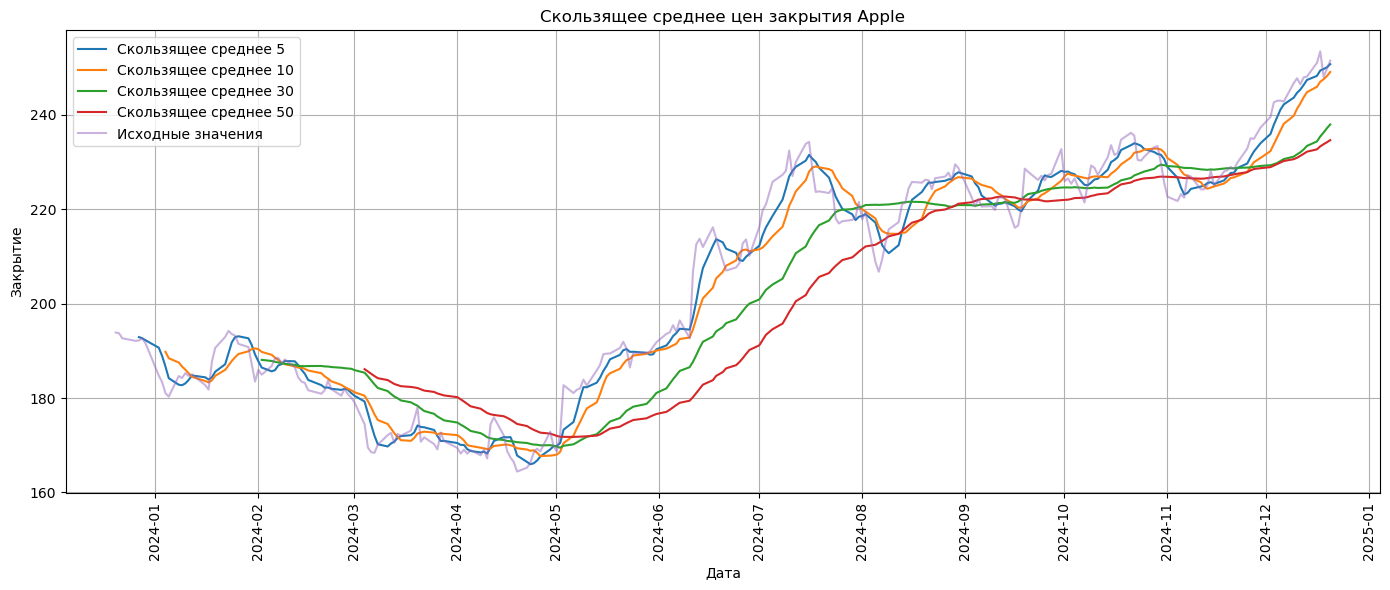

In [21]:
# Скользящее среднее
window_sizes = [5, 10, 30, 50]
plt.figure(figsize=(14, 6))

for window in window_sizes:
    rolling_mean = df["Close"].rolling(window=window).mean()  # Используем столбец 'Close'
    plt.plot(df.index, rolling_mean, label=f"Скользящее среднее {window}")

plt.plot(df.index, df["Close"], label="Исходные значения", alpha=0.5)  # Исходные значения
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0] - pd.Timedelta(days=15), df.index[-1] + pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("Скользящее среднее цен закрытия Apple")
plt.legend()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()


### Экспоненциальные скользящие средние
Экспоненциальные скользящие средние (EMA) также были построены с теми же окнами. EMA лучше отслеживают текущие изменения, так как они больше учитывают последние данные. Это видно на графике, где EMA более точно следуют за реальной ценой по сравнению с SMA.

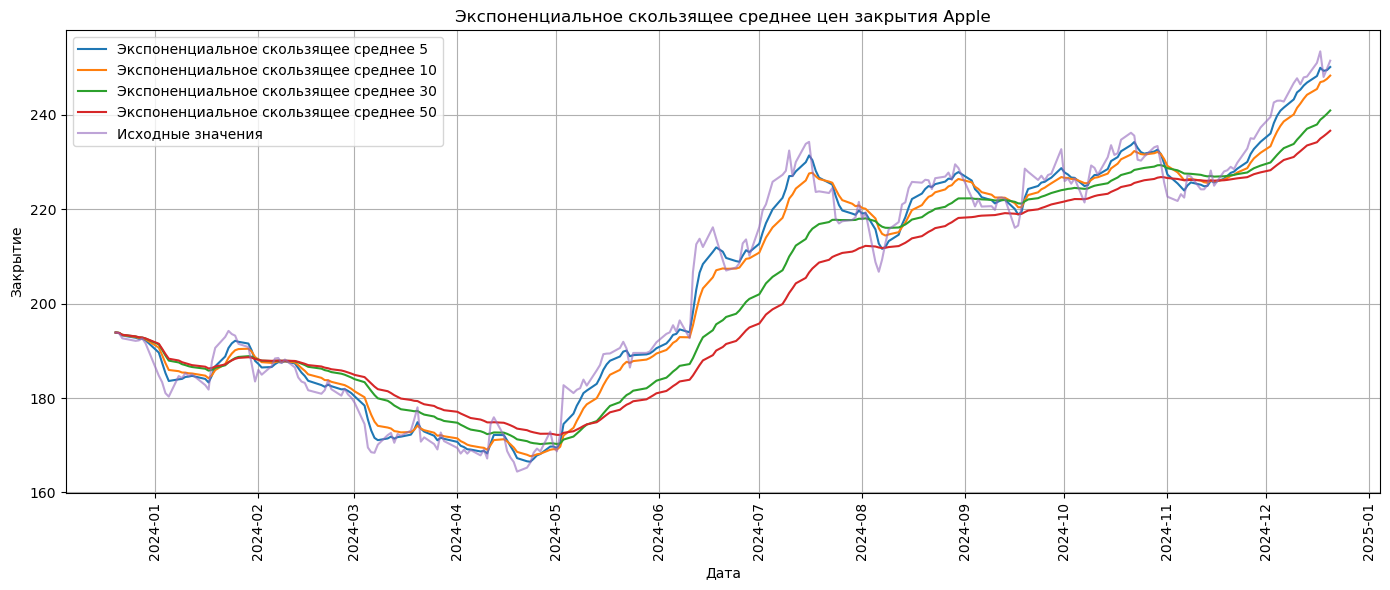

In [24]:
# Экспоненциальные скользящие средние
plt.figure(figsize=(14, 6))

for window in window_sizes:
    exp_moving_avg = df["Close"].ewm(span=window).mean()  # Используем столбец 'Close'
    plt.plot(df.index, exp_moving_avg, label=f"Экспоненциальное скользящее среднее {window}")

plt.plot(df.index, df["Close"], label="Исходные значения", alpha=0.6)  # Исходные значения
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0] - pd.Timedelta(days=15), df.index[-1] + pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("Экспоненциальное скользящее среднее цен закрытия Apple")
plt.legend()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()


### Прогнозирование

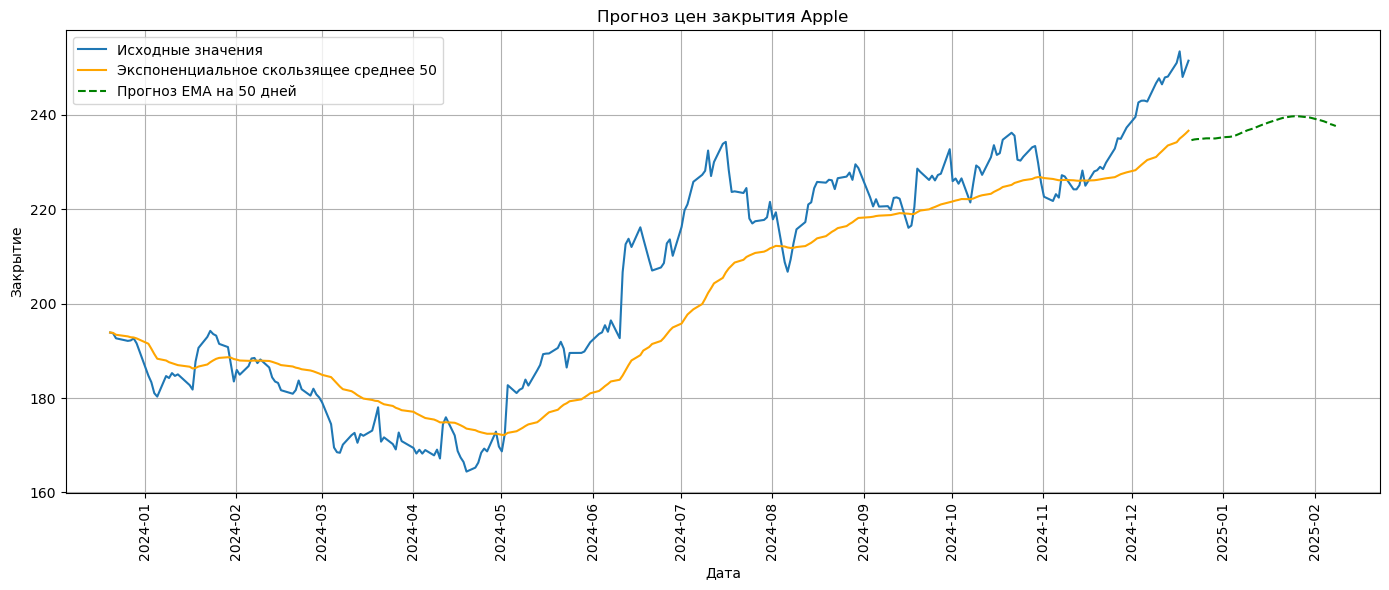

In [26]:
# Прогнозирование
window_size = 50
ema = df["Close"].ewm(span=window_size).mean()  # EMA с окном 50
forecast_days = 50
last_known_date = df.index[-1]
future_dates = [last_known_date + pd.Timedelta(days=i) for i in range(1, forecast_days + 1)]

# Генерация прогноза на основе среднего последних значений
future_ema = []
last_values = df["Close"][-window_size:].tolist()  # Последние значения для прогноза
for i in range(forecast_days):
    future_value = np.mean(last_values)
    future_ema.append(future_value)
    last_values.pop(0)
    last_values.append(future_value)

# Создание DataFrame для прогноза
future_df = pd.DataFrame(data=future_ema, index=future_dates, columns=['Forecast'])

# Объединение исходных данных и прогноза
combined_df = pd.concat([df, future_df])

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Исходные значения")
plt.plot(ema, label=f"Экспоненциальное скользящее среднее {window_size}", color="orange")
plt.plot(future_df, label="Прогноз EMA на 50 дней", color="green", linestyle="dashed")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0] - pd.Timedelta(days=15), future_dates[-1] + pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("Прогноз цен закрытия Apple")
plt.legend()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()


## Вывод
Временной ряд цен акций Apple показывает значительный рост за последние годы с периодическими коррекциями.
Автокорреляция указывает на наличие сильных трендов в данных, что делает этот временной ряд подходящим для анализа и прогнозирования.
Простые скользящие средние (SMA) сглаживают колебания цен, но с большими окнами они могут терять связь с текущими изменениями.
Экспоненциальные скользящие средние (EMA), в отличие от SMA, более чувствительны к последним изменениям, что делает их более точными для краткосрочного анализа.
Прогноз на основе EMA может быть полезен для краткосрочного предсказания будущих цен, однако для более длительных прогнозов требуется учитывать дополнительные факторы.
Скользящие средние, особенно EMA, являются мощным инструментом для анализа и прогнозирования временных рядов в финансовых данных, но их следует использовать с осторожностью, особенно при попытке долгосрочного прогнозирования
